In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale

Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

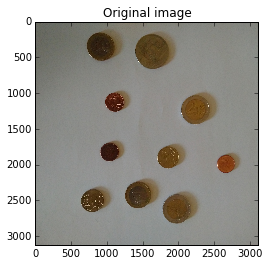

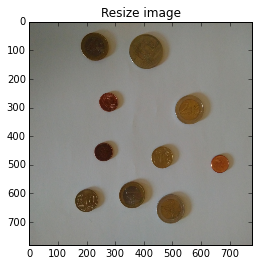

In [18]:
from scipy import misc

Path = './images/'
Coins_im = img_as_ubyte(imread(Path.__add__('coins.jpg')))
plt.figure()
plt.imshow(Coins_im)
plt.title('Original image')
plt.show()

Coins_im = misc.imresize(Coins_im, 25)

plt.figure()
plt.imshow(Coins_im)
plt.title('Resize image')
plt.show()

Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

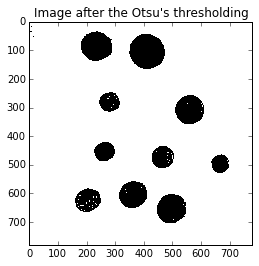

In [28]:
Coins_gray = rgb2gray(Coins_im)
Coins_Thr = threshold_otsu(Coins_gray)
Coins_Otsu = Coins_gray >= Coins_Thr

plt.figure()
imshow(Coins_Otsu)
plt.title('Image after the Otsu\'s thresholding' )

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

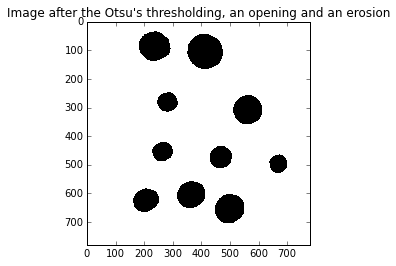

In [105]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat

selem = disk(2)


Coins_MOtsu = opening(Coins_Otsu, selem)
Coins_MOtsu = dilation(Coins_MOtsu, selem)
Coins_MOtsu = closing(Coins_MOtsu, selem)
Coins_MOtsu = erosion(Coins_MOtsu, selem)
Coins_MOtsu = closing(Coins_MOtsu, selem)


plt.figure()
imshow(Coins_MOtsu)
plt.title('Image after the Otsu\'s thresholding, an opening and an erosion' )

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

There is  11 labels in this image
The diameter of the  0 th regions is 106.0  pixels, located at  (87.57047132311186, 234.6144236229415)
The diameter of the  1 th regions is 123.0  pixels, located at  (105.57614277296068, 410.39868675814461)
The diameter of the  2 th regions is 70.0  pixels, located at  (281.24112004148299, 280.24060150375942)
The diameter of the  3 th regions is 101.0  pixels, located at  (308.42948955629714, 559.55320726733407)
The diameter of the  4 th regions is 69.0  pixels, located at  (454.33678343949043, 262.7269108280255)
The diameter of the  5 th regions is 78.0  pixels, located at  (473.52007528230865, 465.39565035549981)
The diameter of the  6 th regions is 64.0  pixels, located at  (496.42620904836195, 665.76755070202807)
The diameter of the  7 th regions is 96.0  pixels, located at  (603.93910652920965, 362.39120274914092)
The diameter of the  8 th regions is 85.0  pixels, located at  (623.45681179775283, 204.54827949438203)
The diameter of the  9 th regi

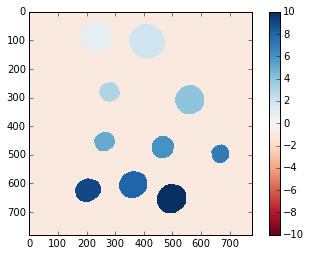

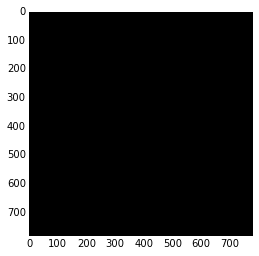

In [156]:
[Coins_label, label_num] = label(Coins_MOtsu, 8, True, True, 2)

plt.figure()
imshow(Coins_label)

print('There is ', label_num, 'labels in this image')
for region in regionprops(Coins_label):
    props = regionprops(Coins_label)
    
Coins_Circle = np.zeros(np.shape(Coins_label)) 

for k in range (0, label_num-1):
    print('The diameter of the ', k, 'th regions is', round(props[k].equivalent_diameter), 
          ' pixels, located at ', props[k].centroid)
    (props[k].centroid, round(props[k].equivalent_diameter))



plt.figure()
imshow(Coins_Circle)

# Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 